In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
csvFile = pd.read_csv(('/Users/xinqingfang/Desktop/coffee_shop_revenue.csv'))

ImportError: Error importing numpy: you should not try to import numpy from
        its source directory; please exit the numpy source tree, and relaunch
        your python interpreter from there.

In [35]:
df = pd.read_csv('coffee_shop_revenue.csv')
print(df.head())

   Number_of_Customers_Per_Day  Average_Order_Value  Operating_Hours_Per_Day  \
0                          152                 6.74                       14   
1                          485                 4.50                       12   
2                          398                 9.09                        6   
3                          320                 8.48                       17   
4                          156                 7.44                       17   

   Number_of_Employees  Marketing_Spend_Per_Day  Location_Foot_Traffic  \
0                    4                   106.62                     97   
1                    8                    57.83                    744   
2                    6                    91.76                    636   
3                    4                   462.63                    770   
4                    2                   412.52                    232   

   Daily_Revenue  
0        1547.81  
1        2084.68  
2        3118.39 

In [37]:
X = df.drop(columns=['Daily_Revenue'])  # Select all columns except the target
y = df['Daily_Revenue']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()  # Initialize model
model.fit(X_train, y_train)  # Train model on training data

print("Intercept:", model.intercept_)
print("Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef}")

Intercept: -1535.513001451807
Coefficients:
Number_of_Customers_Per_Day: 5.572657430056899
Average_Order_Value: 245.18094670980142
Operating_Hours_Per_Day: 0.2676766658605228
Number_of_Employees: -1.7735285519796389
Marketing_Spend_Per_Day: 1.5364263882787317
Location_Foot_Traffic: 0.017338073551198704


Mean Squared Error (MSE): 97569.72294013858
R² Score: 0.8955768408109979


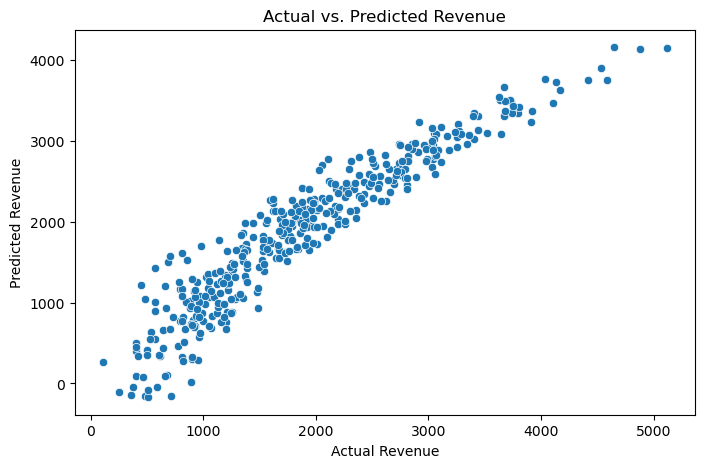

In [39]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)

plt.figure(figsize=(8,5))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs. Predicted Revenue")
plt.show()